In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axe
import seaborn as sns
import scipy.stats as stats
import numpy as np

import and clean initial data

In [26]:
columns = ['year', 'month', 'title', 'abstract', 'first_author', 'journal_name', 'journal_abb', 'language']
df_2014 =pd.read_csv('C:/Users/Esme/Desktop/Springboard/Data_Scrapper/Cancer_results_2014_Jan_test.tab', index_col = 0, header= 0, sep="\t", engine = 'python', na_filter = False, parse_dates = columns)
df_2015=pd.read_csv('C:/Users/Esme/Desktop/Springboard/Data_Scrapper/Cancer_results_2015.tab', index_col = 0, header= 0, sep="\t", engine = 'python', na_filter = False, parse_dates = columns)
df_2016=pd.read_csv('C:/Users/Esme/Desktop/Springboard/Data_Scrapper/Cancer_results_2016_1.tab', index_col = 0, header= 0, sep="\t", engine = 'python', na_filter = False, parse_dates = columns)
df_2013=pd.read_csv('C:/Users/Esme/Desktop/Springboard/Data_Scrapper/Cancer_results_2013.tab', index_col = 0, header= 0, sep="\t", engine = 'python', na_filter = False, parse_dates = columns)
df_2012=pd.read_csv('C:/Users/Esme/Desktop/Springboard/Data_Scrapper/Cancer_results_2012.tab', index_col = 0, header= 0, sep="\t", engine = 'python', na_filter = False, parse_dates = columns)

In [27]:
df_2014_edited = df_2014
df_2015_edited = df_2015
df_2016_edited = df_2016
df_2013_edited = df_2013
df_2012_edited = df_2012

# setting an editing list of each DF to work with
# clean up the year, and save as an intiger in each DF
df_2014_edited['year']= df_2014['year'].astype(str).str[:4].astype(int)
df_2015_edited['year']= df_2015['year'].astype(str).str[:4].astype(int)
df_2016_edited['year']= df_2016['year'].astype(str).str[:4].astype(int)
df_2013_edited['year']= df_2013['year'].astype(str).str[:4].astype(int)
df_2012_edited['year']= df_2012['year'].astype(str).str[:4].astype(int)

columns_names = [ 'Year', 'Month', 'Paper Title', 'Abstract', 'First Author Name', 'Journal Name', 'Journal Abb.', 'Language']
df_2014_edited.columns = columns_names
df_2015_edited.columns = columns_names
df_2016_edited.columns = columns_names
df_2013_edited.columns = columns_names
df_2012_edited.columns = columns_names

df_2012_edited['Language']= df_2012_edited['Language'].astype(str).str[2:5]
df_2013_edited['Language']= df_2013_edited['Language'].astype(str).str[2:5]
df_2014_edited['Language']= df_2014_edited['Language'].astype(str).str[2:5]
df_2015_edited['Language']= df_2015_edited['Language'].astype(str).str[2:5]
df_2016_edited['Language']= df_2016_edited['Language'].astype(str).str[2:5]

In [28]:
df_2012_2013 = df_2012_edited.append(df_2013_edited)
df_2012_2013_2014 = df_2012_2013.append(df_2014_edited)
df_2012_2013_2014_2015 = df_2012_2013_2014.append(df_2015_edited)
df_all = df_2012_2013_2014_2015.append(df_2016_edited)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21685 entries, 28473730 to 28040198
Data columns (total 8 columns):
Year                 21685 non-null int32
Month                21685 non-null int64
Paper Title          21685 non-null object
Abstract             21685 non-null object
First Author Name    21685 non-null object
Journal Name         21685 non-null object
Journal Abb.         21685 non-null object
Language             21685 non-null object
dtypes: int32(1), int64(1), object(6)
memory usage: 1.4+ MB


# Back to the Point: Regression analysis
At this point I have 3 questions:

1) Does the rate of publications by month fit a normal distribution? I.e. what does the data look like?

2) Does the overall trend in increase in Cancer papers fit a similar increase in overall publications? Or does the rate of increase differ drastically?

3) Was the difference in monthly publications in 2014 significant? And if so why?

Starting Hypothesis:
Publication rate over 3 years( 2014-2016, inclusive) for PubMed publications containing keyword "Cancer" follow a normal distribution
H0: Distribution fits within a margin of error with normal distribution bell curve.
H1: Distribution does not fit on bell curve, within a margin of error. 

In [29]:
dates_count= df_all.groupby(['Year', 'Month']).Month.count()
#isolate the number of publications by each month/year

chi_squared, p_value = stats.normaltest(dates_count)
print(p_value)
# find p_value likelhood that the distribution of papers by month for all the years matches a normal distribution

3.22487385117e-16


In [43]:
print(chi_squared)

71.3409353087


 The reported p value when looking across the four years fits < 0.05, in fact it is 0.0000000000000003224...
 Which is a very convinencing P value. 
 
 the p_value for each year individually is more of a question
 Does each year fall into a normal distribution? Especially given that they have a different N value. 

In [53]:
count_2012= df_2012_edited.groupby(['Year', 'Month']).Month.count()
count_2013= df_2013_edited.groupby(['Year', 'Month']).Month.count()
count_2014= df_2014_edited.groupby(['Year', 'Month']).Month.count()
count_2015= df_2015_edited.groupby(['Year', 'Month']).Month.count()
count_2016= df_2016_edited.groupby(['Year', 'Month']).Month.count()

month_2012 = df_2012_edited['Month']
month_2013 = df_2013_edited['Month']
month_2014 = df_2014_edited['Month']
month_2015 = df_2015_edited['Month']
month_2016 = df_2016_edited['Month']



#isolate the number of publications by each month/year

chi_squared_12, p_value_12 = stats.normaltest(count_2012)
chi_squared_13, p_value_13 = stats.normaltest(count_2013)
chi_squared_14, p_value_14 = stats.normaltest(count_2014)
chi_squared_15, p_value_15 = stats.normaltest(count_2015)
chi_squared_16, p_value_16 = stats.normaltest(count_2016)

print("The P values measuring the likelhood that the different years  publication trends follow a normal distribution are- 2012: %0.6F, 2013: %0.6F, 2014: %0.6F, 2015: %0.6F and 2016: %0.6F" % (p_value_12,p_value_13, p_value_14, p_value_15, p_value_16))

The P values measuring the likelhood that the different years  publication trends follow a normal distribution are- 2012: 0.000000, 2013: 0.000000, 2014: 0.035866, 2015: 0.000000 and 2016: 0.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [54]:
print(p_value_12)

2.32591939532e-18


All p values are still a lot lower then 0.05 percent. Therefore fit a normal distribution. I would now confidently accept the null hypothesis.

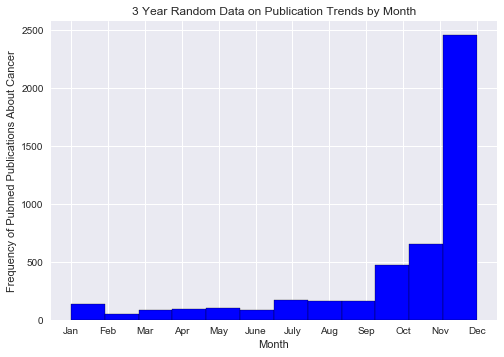

In [24]:
_= plt.hist(x = df_2013_edited['Month'], bins= 12, color = 'blue', histtype = 'bar', edgecolor = 'black')
_ = plt.xlabel('Month')
_= plt.ylabel('Frequency of Pubmed Publications About Cancer')
_= plt.title ('3 Year Random Data on Publication Trends by Month')
months=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
_ = plt.xticks(months, labels)
_= plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


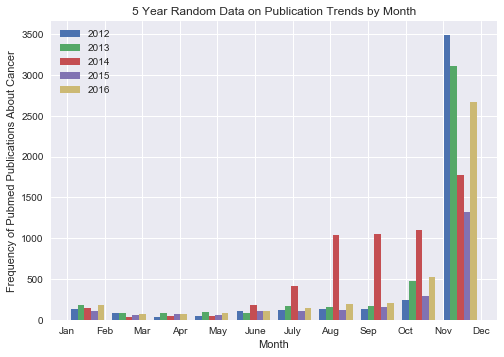

In [42]:


group_all = (month_2012, month_2013, month_2014, month_2015, month_2016)
_=plt.hist(group_all, align= 'mid')
_ = plt.xlabel('Month')
_= plt.ylabel('Frequency of Pubmed Publications About Cancer')
_= plt.title ('5 Year Random Data on Publication Trends by Month')
months=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
_ = plt.xticks(months, labels)
years = ['2012', '2013', '2014', '2015', '2016']
_= plt.legend( 'upper left', labels = years)

_= plt.show()

What is the margin of error and confidence interval of the publication per month between the years?
This is especially important because the years have different total data points- as is visible in the graph above. 

In [57]:
mean_2012 = np.mean(month_2012)
mean_2013 = np.mean(month_2013)
mean_2014 = np.mean(month_2014)
mean_2015 = np.mean(month_2015)
mean_2016 = np.mean(month_2016)

var_2012 = np.var(month_2012)
var_2013 = np.var(month_2013)
var_2014 = np.var(month_2014)
var_2015 = np.var(month_2015)
var_2016 = np.var(month_2016)

n_2012 = len(month_2012)
n_2013 = len(month_2013)
n_2014 = len(month_2014)
n_2015 = len(month_2015)
n_2016 = len(month_2016)

std_2012 = np.std(month_2012)
std_2013 = np.std(month_2013)
std_2014 = np.std(month_2014)
std_2015 = np.std(month_2015)
std_2016 = np.std(month_2016)


In [59]:
stats.f_oneway( month_2012, month_2013, month_2014, month_2015, month_2016)

F_onewayResult(statistic=225.73566120684927, pvalue=3.4635390317028267e-190)

In [ ]:
se_CI = np.sqrt((mean_b*(1 - mean_b)/(len(b_data_c))) + (mean_w*(1 - mean_w) /(len(w_data_c))))

t, p = stats.ttest_ind_from_stats(mean_b, np.sqrt(var_b), n_b,
                           mean_w, np.sqrt(var_w), n_w,
                           equal_var= False)